# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError


Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
from sklearn.metrics import mean_squared_error


class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.linalg.norm(X @ w - y) ** 2 / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 * X.T @ (X @ w - y)) / X.shape[0]


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")


27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    output = [w_init]
    for i in range(n_iterations):
        output.append(output[-1] - lr * loss.calc_grad(X, y, output[-1]))
    return output


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)


(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))


425.5891768045025
0.8670644395649494


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(20, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()


**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.0009


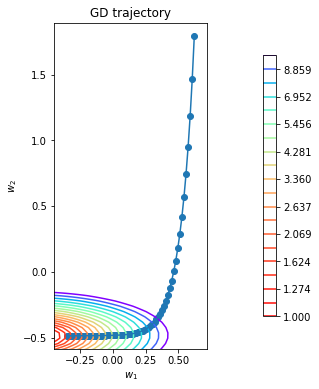

lr = 0.001


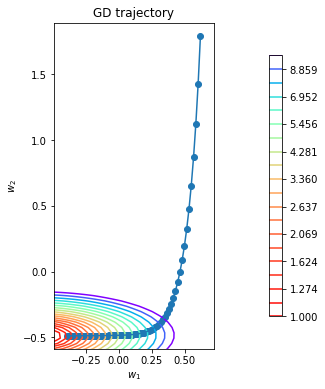

lr = 0.003


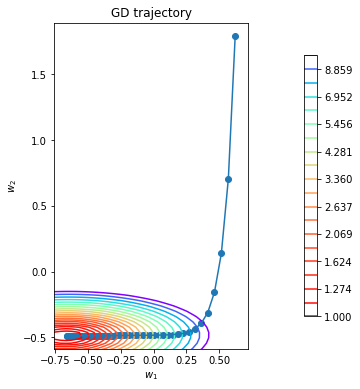

lr = 0.006


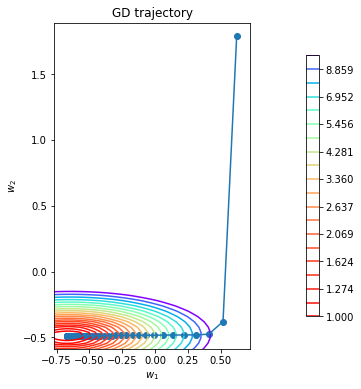

lr = 0.01


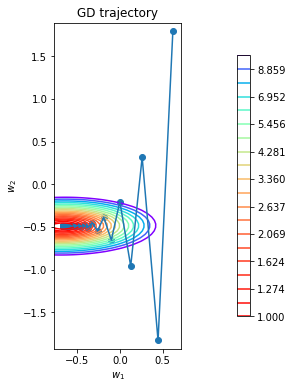

In [ ]:
test_lr = [0.0009, 0.001, 0.003, 0.006, 0.01]
for lr in test_lr:
    w_hist = gradient_descent(w_init, X, y, loss, lr, 100)
    print(f"lr = {lr}")
    plot_gd(w_hist, X, y, loss)


In [ ]:
# Длина шага влияет на скорость нахождения минимума. Ну это очевидно - чем больше шаг, тем быстрее дойдем до минимума.
# При этом если шаг слишком большой, то существует опасность перескочить минимум.


Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    output = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        output.append(output[-1] - lr * loss.calc_grad(batch, batch_y, output[-1]))
    return output


**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Lr = 0.0009, batch_size = 1


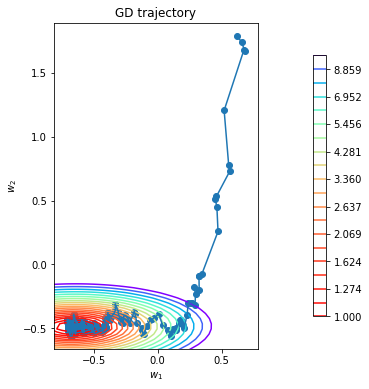

Lr = 0.001, batch_size = 1


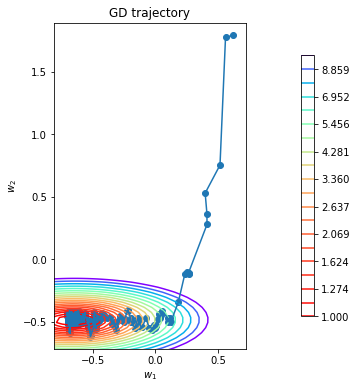

Lr = 0.006, batch_size = 1


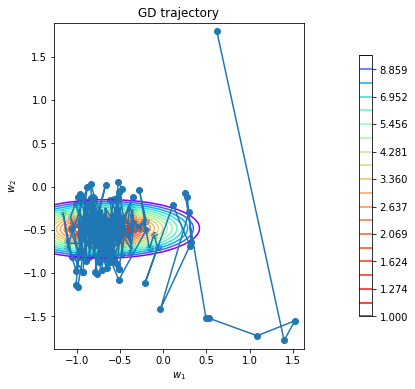

Lr = 0.01, batch_size = 1


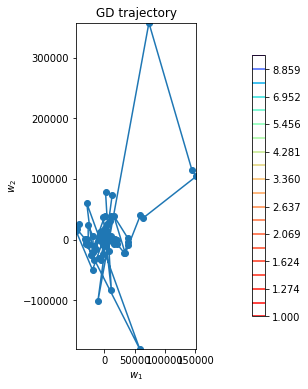

Lr = 0.0009, batch_size = 10


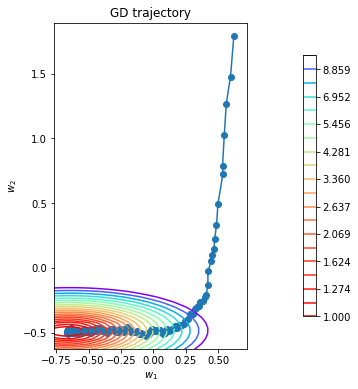

Lr = 0.001, batch_size = 10


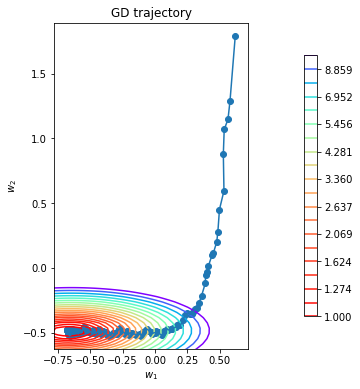

Lr = 0.006, batch_size = 10


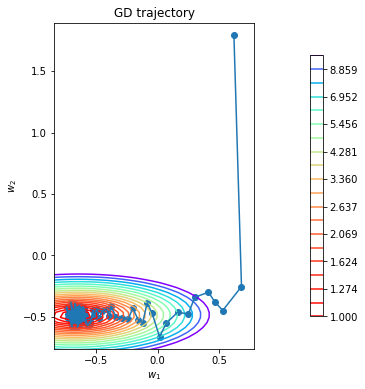

Lr = 0.01, batch_size = 10


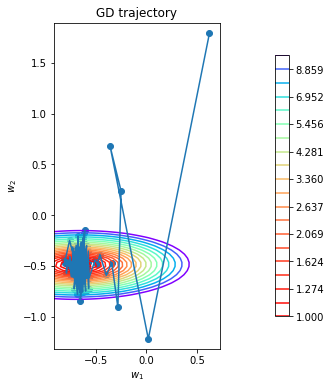

Lr = 0.0009, batch_size = 30


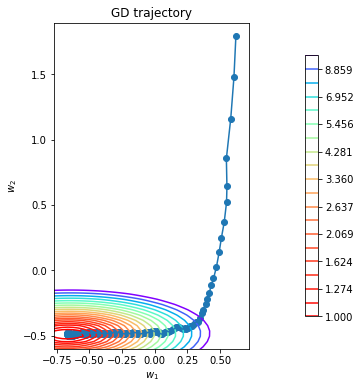

Lr = 0.001, batch_size = 30


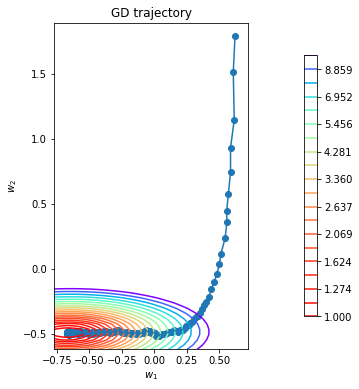

Lr = 0.006, batch_size = 30


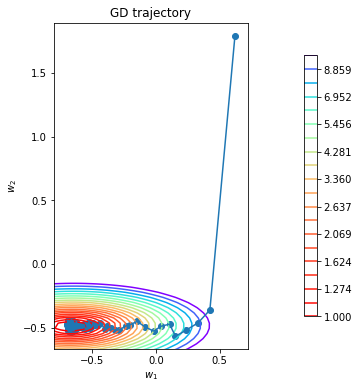

Lr = 0.01, batch_size = 30


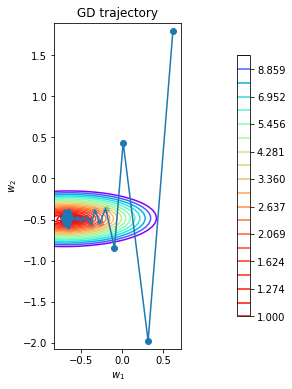

Lr = 0.0009, batch_size = 50


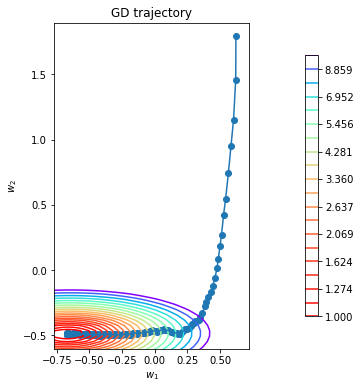

Lr = 0.001, batch_size = 50


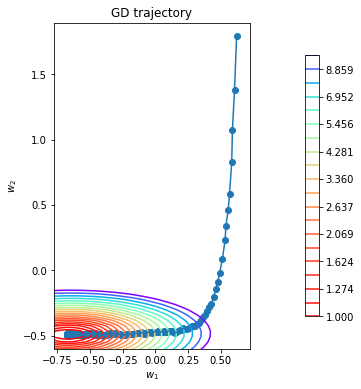

Lr = 0.006, batch_size = 50


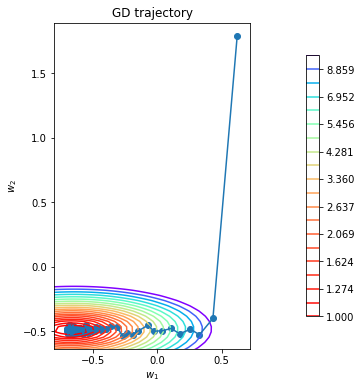

Lr = 0.01, batch_size = 50


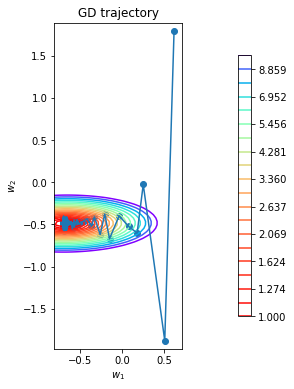

In [ ]:
import itertools

test_lr = [0.0009, 0.001, 0.006, 0.01]
test_batch_size = [1, 10, 30, 50]
for batch_size, lr in itertools.product(test_batch_size, test_lr):
    w_hist = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 500)
    print(f"Lr = {lr}, batch_size = {batch_size}")
    plot_gd(w_hist, X, y, loss)


In [ ]:
# Стохастический градиентный спуск отличается от обычного тем, что при каждой итерации он считает градиент на небольшом
# количестве случайных объектов, а не на всех обьектах, поэтому его жёстко трясёт и выглядит это очень неочень, но работает быстрее.
# Впринципе работает хорошо: двигается в сторону минимума, но, когда он уже находится около минимума, начинает трясти сильно, особенно
# при большом шаге и маленьком batch_size. Поэтому при приближении к минимуму шаг лучше уменьшать.


Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s = 1
    output = [w_init]
    true_lr = lr
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        batch_y = y[batch_indices]
        true_lr = true_lr * (s / (s + i)) ** p
        output.append(output[-1] - true_lr * loss.calc_grad(batch, batch_y, output[-1]))
    return output


**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


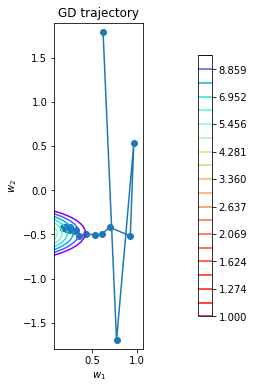

p = 0.2


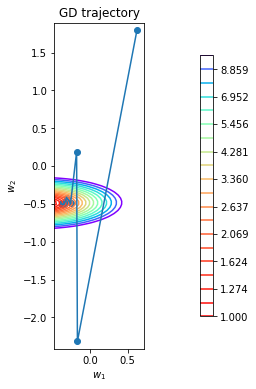

p = 0.3


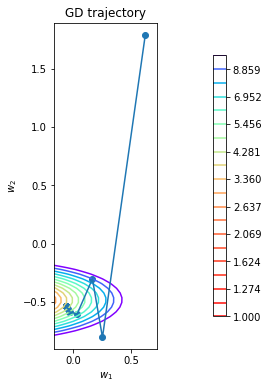

p = 0.5


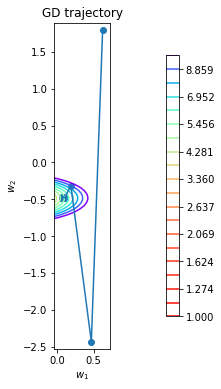

p = 0.8


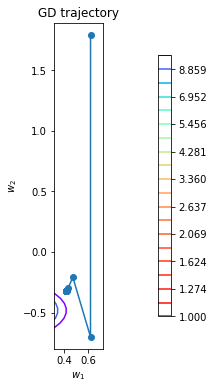

p = 1


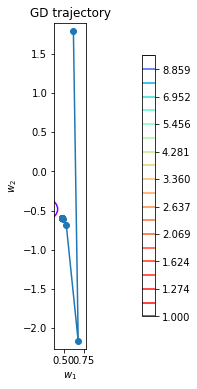

In [ ]:
test_p = [0.1, 0.2, 0.3, 0.5, 0.8, 1]
for p in test_p:
    w_hist = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 500)
    print(f"p = {p}")
    plot_gd(w_hist, X, y, loss)


In [ ]:
# p влияет на размер шага, по графикам видно, что сначала шаг большой, а потом уменьшается. Важно правильно подобрать этот параметр,
# так как если подобрать неправильно, то шаги станут очень маленькими и не дойдет до минимума.


**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

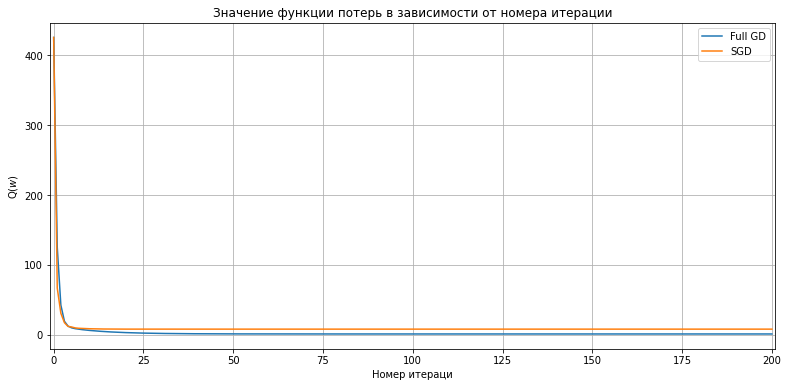

In [ ]:
num_steps = 200
w_hist_grad = gradient_descent(w_init, X, y, loss, 0.003, num_steps)
w_hist_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.003, 10, 0.1, num_steps)
loss_grad = [loss.calc_loss(X, y, w) for w in w_hist_grad]
loss_sgd = [loss.calc_loss(X, y, w) for w in w_hist_sgd]

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps + 1), loss_grad, label="Full GD")
plt.plot(range(num_steps + 1), loss_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итераци")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()


In [ ]:
# Основное преймущество SGD в том, что при каждой итерации считается градиент на небольшом(в сравнении со всей обучающей выборкой)
# количестве объектов, поэтому используется меньше ресурсов компьютера и меньше времени. При этом результат получается хороший.
# Недостатком является то, что не существует универсальных параметров p,s,lr,batch_size и их приходится настраивать под каждую модель.
# Наш обьем обучающих данных маленький, поэтому преимущества SGD не заметны.
# По графику видно, что SGD чуть чуть уступает в ошибке.


## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        temp_w = np.random.normal(size=(X.shape[1],))
        self.w = gradient_descent(temp_w, X, y, self.loss, self.lr, 10000)[-1]

        return self.w

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X @ self.w


Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
general_lr = 0.1
linear_regression = LinearRegression(MSELoss(), general_lr)


Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
    index_col=0,
)
X_raw = X_raw[~X_raw[25].isna()].reset_index()
X_raw.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
X_raw.isnull().any().any()
# Пропущенные значения есть


True

In [ ]:
X_raw.info()
# Категориальные признаки есть


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       164 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       199 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      197 non-null    float64
 19  19      197 non-null    float64
 20  20      201 non-null    float64
 21  21      199 non-null    float64
 22  22

In [ ]:
from sklearn.impute import SimpleImputer

mis_replacer = SimpleImputer(strategy="mean")

cat_features_mask = (X_raw.dtypes == "object").values

X_num = X_raw[X_raw.columns[~cat_features_mask]]

X_num_no_mis = pd.DataFrame(
    data=mis_replacer.fit_transform(X_num), columns=X_num.columns
)
# Заменили числовые пропуски средними величинами


In [ ]:
X_cat_no_mis = X_raw[X_raw.columns[cat_features_mask]].fillna("")
# Заменили категориальные пропуски на пустые строки


In [ ]:
X_no_mis = pd.concat([X_num_no_mis, X_cat_no_mis], axis=1)
X_no_mis.isnull().any().any()
# Объеденили датафреймы и пропушеных значений в них нет


False

In [ ]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
# Применили one-hot encoding

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_dum, y, test_size=0.3, random_state=1337
)

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

X_train_scaled = pd.DataFrame(
    data=scaler.fit_transform(X_train), columns=X_train.columns
)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
# Отмасштабировали данные


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
linear_regression.fit(X_train_scaled, y_train)


array([-1.55472121e+03, -9.07170887e+02, -3.31449073e+03,  1.58147350e+03,
        9.72608688e+03, -2.15857367e+03,  9.76231972e+03,  1.50677198e+04,
       -3.52842891e+03, -8.42711772e+02, -6.65764550e+02,  9.07456376e+03,
        6.36218734e+03,  2.70264767e+03, -1.18984246e+03,  2.16410578e+03,
        9.64906170e+03, -3.64478481e+03, -3.89921962e+03, -3.16802493e+03,
       -2.71599216e-01,  7.51402339e+03, -2.43985441e+03,  8.43702855e+03,
       -1.67405185e+03, -4.97742962e+03, -2.06772188e+03,  1.34273636e+03,
       -3.24740556e+03,  5.22802384e+03, -4.48707402e+03, -4.83085837e+01,
       -2.08468999e+03, -9.97400816e+02, -1.27169589e+03,  1.38021321e+03,
        2.40067638e+03,  1.26165550e+03, -9.42474137e+02, -2.17670219e+02,
       -3.90077817e+03, -4.54479227e+03, -4.53592247e+03, -4.68932823e+03,
       -7.62735419e+02, -3.70705364e+03,  3.84459700e+03,  2.18251827e+03,
        1.66900837e+03,  1.76002005e+03, -1.90657847e+03,  6.07255067e+02,
       -8.24008877e+03, -

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

print("Train: ", mean_squared_error(y_train, linear_regression.predict(X_train_scaled)))
mse_test = mean_squared_error(y_test, linear_regression.predict(X_test_scaled))
print("Test: ", mse_test)
errors = [
    [
        "MSELoss",
        "lr = " + str(linear_regression.lr),
        "Test = " + str(mse_test),
    ]
]


Train:  1680520.3852835882
Test:  11401442.77364744


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return (
            np.linalg.norm(X @ w - y) ** 2 / X.shape[0]
            + self.coef * np.linalg.norm(w[:-1]) ** 2
        )

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        temp_w = np.copy(w)
        temp_w[-1] = 0
        return (2 * X.T @ (X @ w - y)) / X.shape[0] + 2 * self.coef * temp_w


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1), general_lr)


**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [ ]:
min = 100000000
lambda_ = 0
best_model = 0
for i in np.arange(0.0001, 1, 0.005):
    linear_regression = LinearRegression(MSEL2Loss(i), general_lr)
    linear_regression.fit(X_train_scaled, y_train)
    mse = mean_squared_error(y_test, linear_regression.predict(X_test_scaled))
    if mse < min:
        min = mse
        lambda_ = i
        best_model = linear_regression


In [ ]:
print("Train: ", mean_squared_error(y_train, best_model.predict(X_train_scaled)))
print("Test: ", mean_squared_error(y_test, best_model.predict(X_test_scaled)))
# С регуляризатором ошибка на тренировочной выше, но на тесте ниже.


Train:  2902060.881516691
Test:  6205797.528853628


In [ ]:
errors.append(
    [
        "MSEL2Loss",
        "lr = " + str(linear_regression.lr),
        "lambda = " + str(lambda_),
        "Test = " + str(min),
    ]
)


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X @ w - y
        f = (
            lambda z: z ** 2 / 2
            if -self.eps <= z <= self.eps
            else self.eps * (np.abs(z) - 1 / 2 * self.eps)
        )
        huber = np.vectorize(f)
        return np.sum(huber(z)) / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        x = X @ w - y
        f = lambda z: z if -self.eps <= z <= self.eps else (self.eps * np.sign(z))
        huber = np.vectorize(f)
        return (X.T @ huber(x)) / X.shape[1]


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
min = 100000000
eps = 0
best_model = 0
for i in np.arange(100, 300, 10):
    linear_regression = LinearRegression(HuberLoss(i), general_lr)
    linear_regression.fit(X_train_scaled, y_train)
    mse = mean_squared_error(y_test, linear_regression.predict(X_test_scaled))
    if mse < min:
        min = mse
        eps = i
        best_model = linear_regression


In [ ]:
print("Train: ", mean_squared_error(y_train, best_model.predict(X_train_scaled)))
print("Test: ", mean_squared_error(y_test, best_model.predict(X_test_scaled)))
# С HuberLoss ошибка даже немного увеличилась, но она всё равно гораздо лучше MSELoss


Train:  3598685.9277616455
Test:  6384262.987350122


In [ ]:
errors.append(
    [
        "HuberLoss",
        "lr = " + str(linear_regression.lr),
        "eps = " + str(eps),
        "Test = " + str(min),
    ]
)
print(errors[-1])


['HuberLoss', 'lr = 0.1', 'eps = 290', 'Test = 6384262.987350122']


In [ ]:
print(*errors, sep="\n")
# Сравнение всех моделей


['MSELoss', 'lr = 0.1', 'Test = 11401442.77364744']
['MSEL2Loss', 'lr = 0.1', 'lambda = 0.0051', 'Test = 6205797.528853628']
['HuberLoss', 'lr = 0.1', 'eps = 290', 'Test = 6384262.987350122']


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# Не нашёл смешного мема, поэтому скину фотку алгоритма для бонусного задания


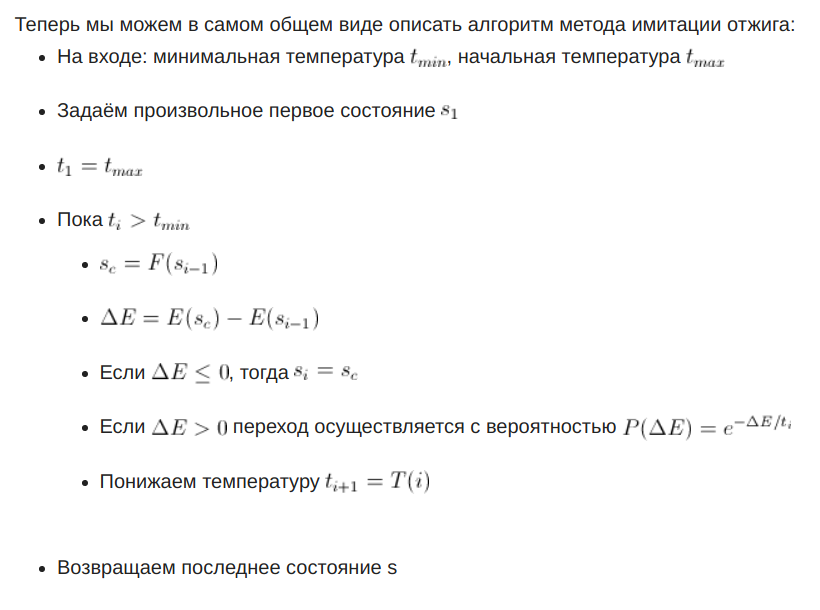

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
def simulated_annealing(w_init, X, y, loss, t_min, t_start):
    w = [w_init]
    i = 0
    T = t_start
    while t_min < T:
        i += 1
        new_w = w[-1] + np.random.standard_t(3, size=w[-1].shape)
        delta_loss = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, w[-1])
        if delta_loss <= 0:
            w.append(new_w)
        else:
            chance = np.exp(-delta_loss / T)
            if np.random.binomial(1, chance):
                w.append(new_w)
        T = t_start * 0.1 / i
    return w
# Алгоритм такой же как на скрине выше. Сохраняется траектория весов в массив для потроения графика

In [ ]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))


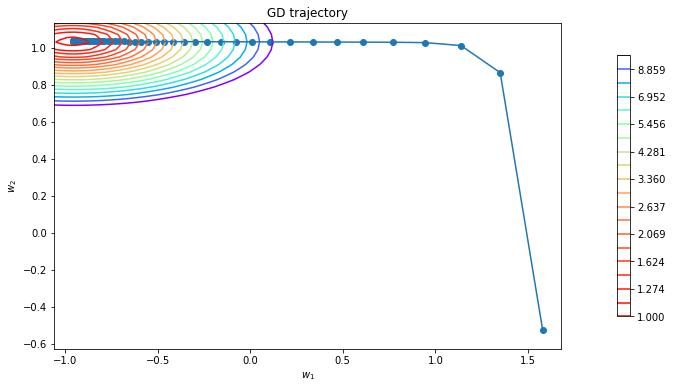

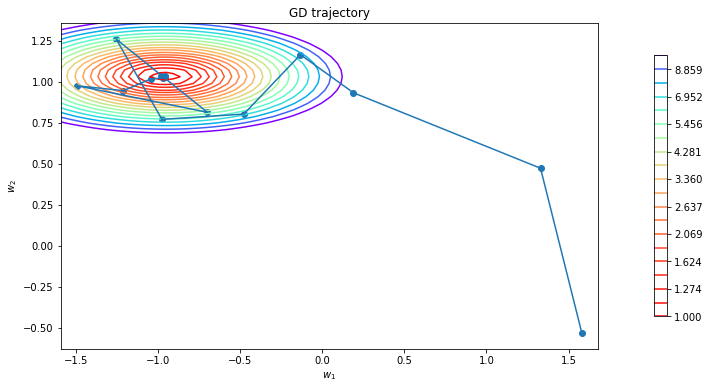

In [ ]:
loss = MSELoss()
w_hist_grad = gradient_descent(w_init, X, y, loss, 0.006, 100)
w_hist_simulated_annealing = simulated_annealing(w_init, X, y, loss, 0.00001, 10)
plot_gd(w_hist_grad, X, y, loss)
plot_gd(w_hist_simulated_annealing, X, y, loss)


In [ ]:
print('Grad')
print(loss.calc_loss(X, y, w_hist_grad[0]))
print(loss.calc_loss(X, y, w_hist_grad[-1]))
print('Simulated annealing')
print(loss.calc_loss(X, y, w_hist_simulated_annealing[0]))
print(loss.calc_loss(X, y, w_hist_simulated_annealing[-1]))

Grad
230.93633157144728
1.061497702060408
Simulated annealing
230.93633157144728
1.0617870585670095
